In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['svg.fonttype'] = 'none'


### PATH

#path = ""

deepCeres = path + "deepCeres/"

acapulco = path + "acapulco/"

suit = path + "vbm_suit/"

ceres = path + "ceres/"


### DATA AND PALETTE

csv_files = {
    "CERES": path + 'ceres/ceres_all_lobules_ICC_ALLGOODDATA.csv',
    "ACAPULCO": path + 'acapulco/acapulco_all_lobules_ICC_ALLGOODDATA.csv',
    "DeepCERES": path + 'deepCeres/deepCeres_all_lobules_ICC_ALLGOODDATA.csv'
}

dataframes = []
for method, file in csv_files.items():
    df = pd.read_csv(file, index_col=0)
    df["Method"] = method
    dataframes.append(df)

df_all = pd.concat(dataframes, ignore_index=True)
df_all = df_all[["Method", "ICC.a", "sigma2_b", "sigma2_w"]].rename(columns={"ICC.a" : "ICC", "sigma2_b": "Between Variation", "sigma2_w": "Within Variation"})

colors = ["#e78ac3", "#ffd92f", "#7570b3", "#1b9e77"]
methods = ["SUIT", "CERES", "ACAPULCO", "DeepCERES"]
palette = dict(zip(methods, colors))

metrics = ["ICC", "Between Variation", "Within Variation"]

# Analysis with all good subjects for each method

In [2]:
df_all.groupby('Method').mean()

,ICC,Between Variation,Within Variation
Method,,,
ACAPULCO,0.816242,0.044251,0.008007
CERES,0.896305,0.045384,0.004311
DeepCERES,0.921919,0.049294,0.002975


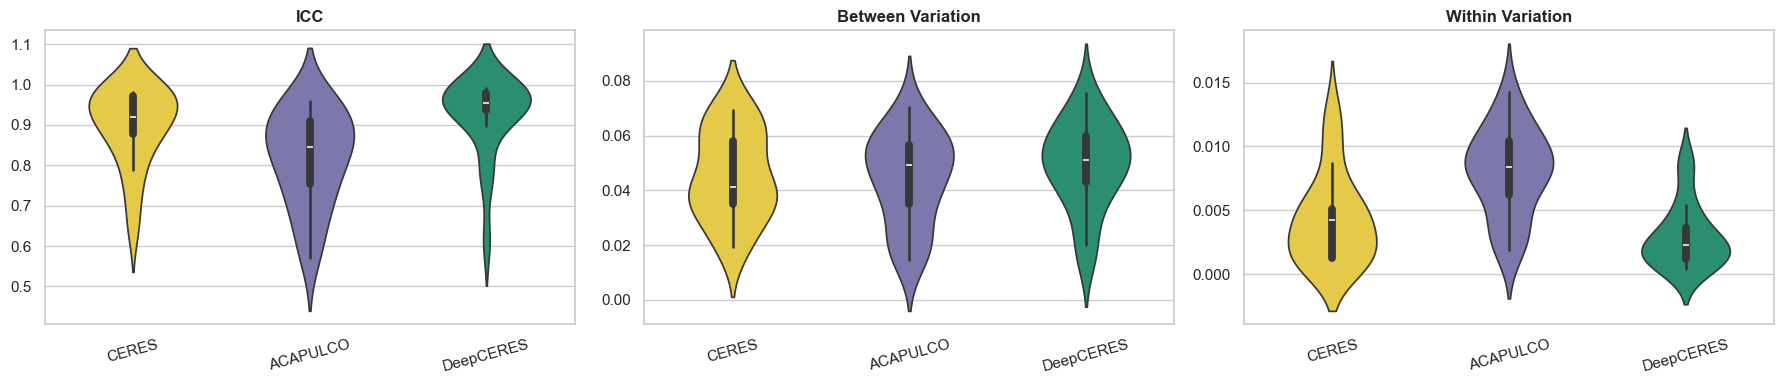

In [3]:
sns.set_theme(style="whitegrid")

n_metrics = len(metrics)
fig, axes = plt.subplots(
    1, n_metrics,
    figsize=(6 * n_metrics, 4)
)

for ax, m in zip(axes, metrics):

    sns.violinplot(
        x="Method", y=m,
        data=df_all,
        inner="box",
        palette=palette,
        hue="Method",
        width=0.5,
        ax=ax,
        legend=False
    )

    ax.set_title(m, weight="bold")
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.tick_params(axis="x", rotation=15)

plt.tight_layout()
plt.show()

# Demographic data

# Ceres

In [4]:
# Get subjects list and information
subjects = pd.read_csv(path+'subjects_Ceres.csv')
subjects_list = subjects['ID'].tolist()

print(subjects_list)
subjects

['sub-0025428', 'sub-0025432', 'sub-0025434', 'sub-0025435', 'sub-0025439', 'sub-0025440', 'sub-0025444', 'sub-0025445', 'sub-0025446', 'sub-0025447', 'sub-0025448', 'sub-0025449', 'sub-0025450', 'sub-0025452', 'sub-0025454', 'sub-0025455']


,ID,age,sex
0,sub-0025428,28,F
1,sub-0025432,21,M
2,sub-0025434,24,M
3,sub-0025435,30,F
4,sub-0025439,24,F
5,sub-0025440,24,M
6,sub-0025444,27,F
7,sub-0025445,23,F
8,sub-0025446,30,M
9,sub-0025447,26,M


In [5]:
subjects['sex'].value_counts()

sex
M    9
F    7
Name: count, dtype: int64

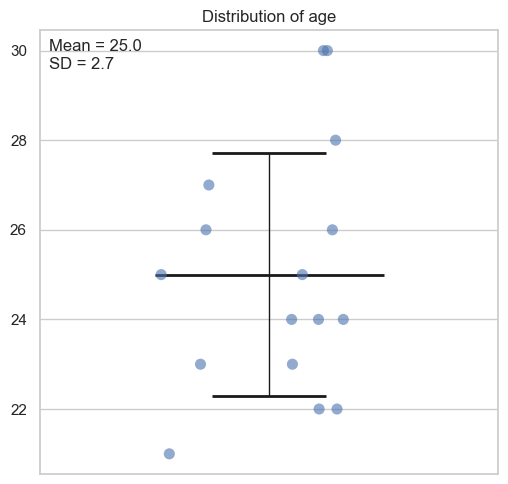

In [6]:
age_control = subjects['age']
age_mean = age_control.mean()
age_std = age_control.std(ddof=1)

fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(1, 2, 1)

# Scatterplot
sns.stripplot(
    data=pd.DataFrame(age_control),
    size=8,
    jitter=0.1,
    alpha=0.6,
    ax=ax
)

# Mean ± SD lines
ax.hlines(age_mean, -0.1, 0.1, colors='k', linewidth=2)
ax.hlines(
    [age_mean - age_std, age_mean + age_std],
    -0.05, 0.05,
    colors='k', linewidth=2
)
ax.vlines(0, age_mean - age_std, age_mean + age_std, colors='k', linewidth=1)

# Axis formatting
ax.set_xlim(-0.2, 0.2)
ax.set_xticks([])
ax.set_xlabel('')
ax.set_title('Distribution of age')

# Text annotation
ax.text(
    0.02, 0.98,
    f'Mean = {age_mean:.1f}\nSD = {age_std:.1f}',
    transform=ax.transAxes,
    ha='left',
    va='top',
    fontsize=12
)

plt.tight_layout()
plt.show()

# Acapulco

In [7]:
# Get subjects list and information
subjects = pd.read_csv(path+'subjects_Acapulco.csv')
subjects_list = subjects['ID'].tolist()

print(subjects_list)
subjects

['sub-0025434', 'sub-0025435', 'sub-0025440', 'sub-0025442', 'sub-0025444', 'sub-0025446', 'sub-0025447', 'sub-0025449', 'sub-0025454', 'sub-0025455']


,ID,age,sex
0,sub-0025434,24,M
1,sub-0025435,30,F
2,sub-0025440,24,M
3,sub-0025442,27,F
4,sub-0025444,27,F
5,sub-0025446,30,M
6,sub-0025447,26,M
7,sub-0025449,22,M
8,sub-0025454,26,M
9,sub-0025455,25,M


In [8]:
subjects['sex'].value_counts()

sex
M    7
F    3
Name: count, dtype: int64

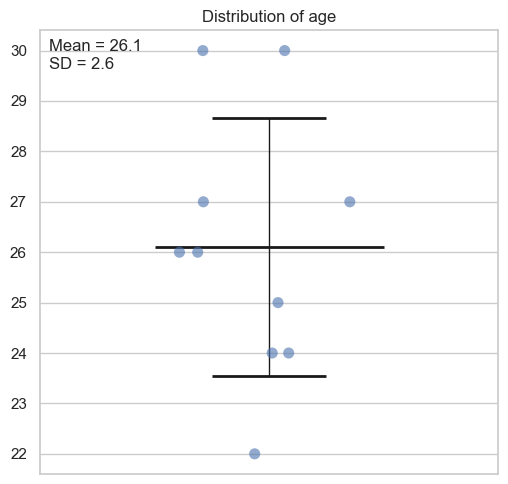

In [9]:
age_control = subjects['age']
age_mean = age_control.mean()
age_std = age_control.std(ddof=1)

fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(1, 2, 1)

# Scatterplot
sns.stripplot(
    data=pd.DataFrame(age_control),
    size=8,
    jitter=0.1,
    alpha=0.6,
    ax=ax
)

# Mean ± SD lines
ax.hlines(age_mean, -0.1, 0.1, colors='k', linewidth=2)
ax.hlines(
    [age_mean - age_std, age_mean + age_std],
    -0.05, 0.05,
    colors='k', linewidth=2
)
ax.vlines(0, age_mean - age_std, age_mean + age_std, colors='k', linewidth=1)

# Axis formatting
ax.set_xlim(-0.2, 0.2)
ax.set_xticks([])
ax.set_xlabel('')
ax.set_title('Distribution of age')

# Text annotation
ax.text(
    0.02, 0.98,
    f'Mean = {age_mean:.1f}\nSD = {age_std:.1f}',
    transform=ax.transAxes,
    ha='left',
    va='top',
    fontsize=12
)

plt.tight_layout()
plt.show()

## DeepCeres

In [10]:
# Get subjects list and information
subjects = pd.read_csv(path+'subjects_DeepCERES.csv')
subjects_list = subjects['ID'].tolist()

print(subjects_list)
subjects

['sub-0025428', 'sub-0025434', 'sub-0025435', 'sub-0025439', 'sub-0025440', 'sub-0025441', 'sub-0025442', 'sub-0025443', 'sub-0025444', 'sub-0025446', 'sub-0025447', 'sub-0025448', 'sub-0025449', 'sub-0025450', 'sub-0025452', 'sub-0025454', 'sub-0025455', 'sub-0025456']


,ID,age,sex
0,sub-0025428,28,F
1,sub-0025434,24,M
2,sub-0025435,30,F
3,sub-0025439,24,F
4,sub-0025440,24,M
5,sub-0025441,24,F
6,sub-0025442,27,F
7,sub-0025443,25,M
8,sub-0025444,27,F
9,sub-0025446,30,M


In [11]:
subjects['sex'].value_counts()

sex
F    9
M    9
Name: count, dtype: int64

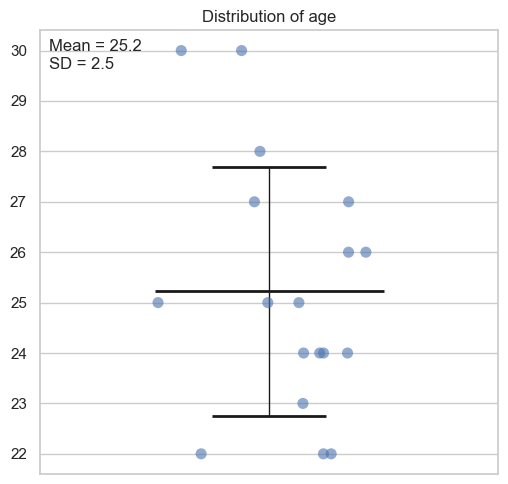

In [12]:
age_control = subjects['age']
age_mean = age_control.mean()
age_std = age_control.std(ddof=1)

fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(1, 2, 1)

# Scatterplot
sns.stripplot(
    data=pd.DataFrame(age_control),
    size=8,
    jitter=0.1,
    alpha=0.6,
    ax=ax
)

# Mean ± SD lines
ax.hlines(age_mean, -0.1, 0.1, colors='k', linewidth=2)
ax.hlines(
    [age_mean - age_std, age_mean + age_std],
    -0.05, 0.05,
    colors='k', linewidth=2
)
ax.vlines(0, age_mean - age_std, age_mean + age_std, colors='k', linewidth=1)

# Axis formatting
ax.set_xlim(-0.2, 0.2)
ax.set_xticks([])
ax.set_xlabel('')
ax.set_title('Distribution of age')

# Text annotation
ax.text(
    0.02, 0.98,
    f'Mean = {age_mean:.1f}\nSD = {age_std:.1f}',
    transform=ax.transAxes,
    ha='left',
    va='top',
    fontsize=12
)

plt.tight_layout()
plt.show()